# Grey Wolf Optimizer (GWO)

O Grey Wolf Optimizer (GWO) é uma meta-heurística baseada no comportamento de caça de lobos cinzentos e é usado principalmente em problemas de otimização contínua e combinatória, especialmente quando o espaço de busca é não linear, multimodal ou de difícil modelagem matemática.

Proposto em 2014 por Mirjalili et al. A meta-heurística ganhou força a partir de 2015 e em 2022 foi a segunda meta-heurística mais citada em trabalhos acadêmicos, atrás apenas para o Particle Swarm Optimization (PSO), como mostra a imagem abaixo.

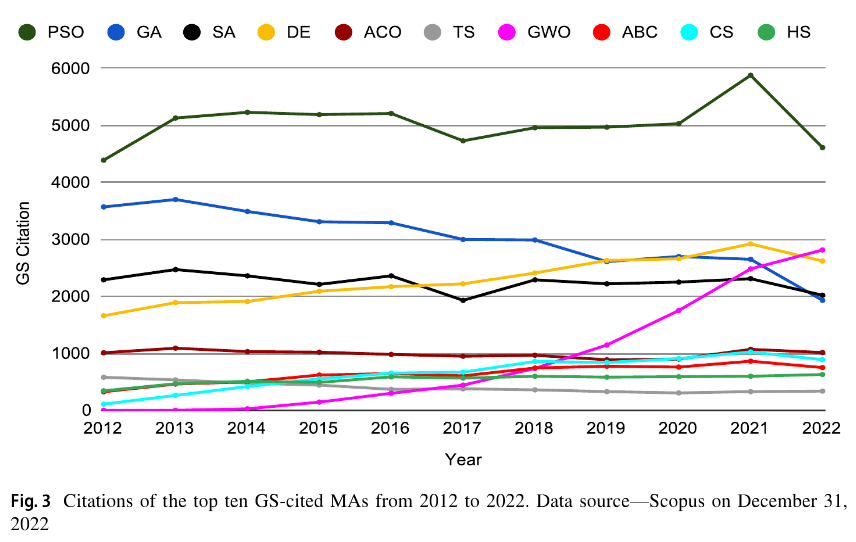

## Inspiração da meta-heurística

A meta-heurística inspira-se no comportamento de lobos cinzentos, principalmente enquanto alcateia.
Referente a organização de uma alcateia, tem a seguinte denominação de indivíduos e organização hierárquica:

* α (alfa): é o lobo líder da alcateia;

* β (beta): o segundo melhor, o lobo que seria o "braço direito" do alfa;

* δ (delta): a maioria dos lobos de uma alcateia;

* ω (ômega): uma "classe baixa" dentro da alcateia, mas importantes para manter o equilibrio social.

Traduzindo para a ideia do algoritmo, temos:

* α (alfa): é a melhor solução;

* β (beta): a segunda melhor solução;

* δ (delta): a terceira melhor solução;

* ω (ômega): demais soluções.

### Caçada

Lobos cinzentos usualmente caçam em grupo cercando sua presa e reduzindo seu espaço até o momento que conseguem atacar com garantia e garantir a caçada.

Traduzindo:

1. Cercam a presa - Espalham-se na vizinhança do objetivo
2. Aproximam-se coordenadamente - Refina a resposta, escolhendo um lugar próximo ao objetivo.
3. Atacam - Acha o objetivo.

### Pontos fortes e fracos

##### Principais usos do GWO

* Problemas contínuos de otimização (como funções matemáticas complexas, ajuste de parâmetros);

* Seleção de características (feature selection) em machine learning;

* Otimização de hiperparâmetros de redes neurais ou SVMs;

* Engenharia elétrica, controle de sistemas, e otimização de energia;

* Planejamento de rotas, alocação de recursos e problemas combinatórios.

##### Pontos Fortes:

* Poucos parâmetros para ajustar (geralmente 2);

* Simples de implementar;

* Boa exploração do espaço de busca.

##### Pontos Fracos:

* Pode convergir prematuramente em funções com muitos mínimos locais;

* Menos eficiente em problemas de alta dimensionalidade se não for adaptado.

## Modelagem matemática e Algoritmo

## Cercando a presa
$$(3.1) \hspace{20px} \vec{D} = \left| \vec{C} \cdot \vec{X}_p(t) - \vec{X}(t) \right| $$

$$(3.2) \hspace{20px} \vec{X}(t+1) = \vec{X}_p(t) - \vec{A} \cdot \vec{D}$$

$ \vec{A}$ -> Vetor de coeficientes que ajuda no Exploration x Exploitation

$ \vec{C}$ -> vetor de coeficientes aleatórios, que controla a influência da presa

$ \vec{D}$ -> Vetor de distância entre lobo e presa

$ \vec{X}_p(t)$ -> Vetor posição da presa   

$ \vec{X}(t)$ -> Vetor de posição de um lobo cinzento   

t -> tempo (iteração)

Os vetores $\vec{A}$ e $\vec{C}$ são calculados da seguinte maneira:

$$(3.3) \hspace{20px} \vec{A} = 2\vec{a} \cdot \vec{r}_1 - \vec{a}$$

$$(3.4) \hspace{20px} \vec{C} = 2 \cdot \vec{r}_2$$

$\vec{a}$ é linearmente diminuido de 2 para 0 sobre o curso de iterações e r1, r2 são vetores aleatórios em [0, 1].

## Caçando

$$(3.5) \hspace{20px}\vec{D}_\alpha = \left| \vec{C}_1 \cdot \vec{X}_\alpha(t) - \vec{X}(t) \right|$$
$$\hspace{35px} \vec{D}_\beta = \left| \vec{C}_2 \cdot \vec{X}_\beta(t) - \vec{X}(t) \right|$$
$$\hspace{35px} \vec{D}_\delta = \left| \vec{C}_3 \cdot \vec{X}_\delta(t) - \vec{X}(t) \right|$$

$$(3.6) \hspace{20px} \vec{X}_1 = \vec{X}_\alpha(t) - \vec{A}_1 \cdot \vec{D}_\alpha$$
$$\hspace{35px}  \vec{X}_2 = \vec{X}_\beta(t) - \vec{A}_2 \cdot \vec{D}_\beta$$
$$\hspace{35px} \vec{X}_3 = \vec{X}_\delta(t) - \vec{A}_3 \cdot \vec{D}_\delta$$
$$(3.7) \hspace{20px} \vec{X}(t+1) = \frac{\vec{X}_1 + \vec{X}_2 + \vec{X}_3}{3}$$
Como sabemos as 3 melhores soluções até o momento, forçamos os demais lobos a atualizarem suas posições de acordo com a posição de alfa, beta e ômega, com a influência de aleatorizações $\vec{A}$ e $\vec{C}$.

## Exploration X Exploitation
$$\vec{a}(t)=2-2t/T$$
t -> iteração atual
T -> número máximo de iterações

$\vec{a}$ é linearmente diminuido de 2 para 0 sobre o curso de iterações e r1, r2 são vetores aleatórios em [0, 1]. Note que durante a execução $\vec{A}$ varia entre [-2a, 2a], em outras palavras, no início $\vec{A}$ tem grande amplitude, resultando em uma ampla exploração, enquanto no fim há um movimento muito pequeno.

### Quando ∣A∣<1
o lobo se move diretamente em direção à presa, ficando entre sua posição atual X(t) e a da presa $X_p(t)$

* Isso é o modo de ataque (exploitation).

### Quando ∣A∣>1:
o lobo se afasta da presa temporariamente, o que serve para explorar outras regiões.
* Isso é o modo de exploração.

O vetor $\vec(C)$ por outro lado, não é decrementado ao longo do tempo, isto quer dizer que ele atua como um fator de perturbação, dificultando o caminho direto até a presa. C gera pesos aleatórios sobre o vetor posição da presa, tornando o movimento dos lobos menos previsível e mais exploratório, isso ajuda a escapar de mínimos locais, especialmente nas últimas iterações.

## Problemas

O GWO pode ficar preso em mínimos locais, pois os lobos começam a se mover muito próximos uns dos outros e param de explorar novas regiões.

Por isso, versões aprimoradas do GWO (como Enhanced GWO, Quantum GWO, Chaotic GWO, etc.) introduzem mutação aleatória, caos logístico, estratégias adaptativas de a, novos operadores de dispersão, etc.



## Pontos Fundamentais

* A hierarquia social proposta ajuda a GWO a salvar o melhor
soluções obtidas até agora ao longo da iteração.

* O mecanismo de cerca proposto define um círculo em forma de círculo
bairro em torno das soluções que podem ser estendidas para
dimensões mais elevadas como uma hiperesfera.

* Os parâmetros aleatórios A e C auxiliam as soluções do candidato a
têm hiperesferas com diferentes raios aleatórios.

* O método de caça proposto permite soluções candidatas para
localizar a posição provável da presa.

* A exploração e a exploração são garantidas pelo adaptativo
valores de a e A.

* Os valores adaptativos dos parâmetros a e A permitem que a GWO
transição suave entre exploração e exploração.

* Com a diminuição de A, metade das iterações são dedicadas a explorar-
ção (|A| P 1) e a outra metade são dedicadas à exploração
(|A| < 1).

* O GWO possui apenas dois parâmetros principais a serem ajustados (a e
C).

## Pseudocódigo

```{r, tidy=FALSE, eval=FALSE}
Inicialize a população de lobos-cinzentos Xi (i = 1, 2, ..., n)
Inicialize os vetores a, A e C
 
Calcule o fitness (aptidão) de cada agente de busca
 
Xa = melhor agente (lobo alfa)
Xβ = segundo melhor agente (lobo beta)
Xδ = terceiro melhor agente (lobo delta)
 
enquanto (t < número máximo de iterações) faça
    para cada agente de busca faça
        Atualize a posição do agente atual pela equação (3.7)
    fim para
 
    Atualize os vetores a, A e C
    Calcule o fitness de todos os agentes de busca
    Atualize Xa, Xβ e Xδ
    t = t + 1
fim enquanto
 
retorne Xa
```

## Bibliotecas que implementam o GWO

[EvoloPy](https://github.com/7ossam81/EvoloPy/tree/master)

[MealPy](https://mealpy.readthedocs.io/en/latest/)

[PyGMO](https://esa.github.io/pygmo2/)


# Implementação

#### Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### funções que queremos minimizar

In [3]:
def f(x):
    return np.sum(np.array(x)**2)

In [4]:
def rastrigin(x):
    return 10*len(x) + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

In [5]:
def rosenbrock(x):
    x = np.array(x)
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2 + 50 # mínimo = 50

In [6]:
def f_shift(x):
    return np.sum(np.array(x+10)**2)

In [7]:
def matyas(x):
    x = np.array(x)
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1] + 5  # mínimo = 5

### Definições de contantes

In [32]:
max_iter = 50
dim = 2
lim_inf = np.array([-100]*dim)
lim_sup = np.array([100]*dim)
num_lobos = 30

### Implementação do GWO

In [9]:
def init_populacao(num_lobos, dim, lim_inf, lim_sup):
    posicoes = np.random.uniform(lim_inf, lim_sup, (num_lobos, dim))
    return posicoes

In [10]:
def att_lideres(pos, func, alpha, beta, delta, num_lobos):
    for i in range(0, num_lobos):
       for j in range(dim):
              pos[i, j] = np.clip(pos[i, j], lim_inf[j], lim_sup[j])

       fitness = func(pos[i, :]) #aplica a funcao objetivo para cada posicao

       if (fitness < alpha['score']):
              delta['pos'], delta['score'] = beta['pos'], beta['score']
              beta['pos'], beta['score'] = alpha['pos'], alpha['score']
              alpha['pos'], alpha['score'] = pos[i].copy(), fitness
       
       elif(fitness < beta['score']):
              delta['pos'], delta['score'] = beta['pos'], beta['score']
              beta['pos'], beta['score'] = pos[i].copy(), fitness
       elif(fitness < delta['score']):
               delta['pos'], delta['score'] = pos[i].copy(), fitness
        
    return fitness, alpha, beta, delta

In [11]:
def hunting(pos, alpha, beta, delta, a, lim_inf, lim_sup):
        num_lobos, dim, = pos.shape

        for i in range(0, num_lobos):
            for j in range(0, dim):

                r1 = np.random.rand()  # r1 é um número aleatório em [0,1]
                r2 = np.random.rand()  # r2 é um número aleatório em [0,1]

                A1 = 2 * a * r1 - a    # Equação (3.3)
                C1 = 2 * r2            # Equação (3.4)

                D_alpha = abs(C1 * alpha['pos'][j] - pos[i, j])  # Equação (3.5)-parte 1
                X1 = alpha['pos'][j] - A1 * D_alpha              # Equação (3.6)-parte 1

                r1 = np.random.rand()
                r2 = np.random.rand()

                A2 = 2 * a * r1 - a    # Equação (3.3)
                C2 = 2 * r2            # Equação (3.4)

                D_beta = abs(C2 * beta['pos'][j] - pos[i, j])      # Equação (3.5)-parte 2
                X2 = beta['pos'][j] - A2 * D_beta                  # Equação (3.6)-parte 2

                r1 = np.random.rand()
                r2 = np.random.rand()

                A3 = 2 * a * r1 - a    # Equação (3.3)
                C3 = 2 * r2            # Equação (3.4)

                D_delta = abs(C3 * delta['pos'][j] - pos[i, j])    # Equação (3.5)-parte 3
                X3 = delta['pos'][j] - A3 * D_delta                # Equação (3.5)-parte 3

                pos[i, j] = (X1 + X2 + X3) / 3  # Equação (3.7)

        return pos

In [12]:
def Grey_Wolf_Optimizer(objf, dim, lim_inf, lim_sup, num_lobos, max_iter):
    #Inicializa populacao inicial
    posicoes = init_populacao(num_lobos, dim, lim_inf, lim_sup)

    #Inicializa Alpha, Beta e Delta

    alpha = {'pos': np.zeros(dim), 'score': float("inf")}
    beta = {'pos': np.zeros(dim), 'score': float("inf")}
    delta = {'pos': np.zeros(dim), 'score': float("inf")}

    curva_conv = []

    for iter in range(max_iter):
        fitness, alpha, beta, delta = att_lideres(posicoes, objf, alpha, beta, delta, num_lobos)

        # a -> Coef para exploration e exploitation
        a = 2 - iter *(2/max_iter) ## a decreases linearly fron 2 to 0

        posicoes = hunting(posicoes, alpha, beta, delta, a, lim_inf, lim_sup)

        curva_conv.append(alpha['score'])

    return alpha, curva_conv, posicoes

## Resultado

In [13]:
def plot_funcao_objetivo(f, lim_inf, lim_sup, resolucao=100):
    """
    Plota a função objetivo f(x, y) em 2D e 3D.
    A função f deve aceitar vetor numpy e retornar escalar.
    """
    x = np.linspace(lim_inf, lim_sup, resolucao)
    y = np.linspace(lim_inf, lim_sup, resolucao)
    X, Y = np.meshgrid(x, y)
    
    # Calcula Z ponto a ponto
    Z = np.zeros_like(X)
    for i in range(resolucao):
        for j in range(resolucao):
            Z[i, j] = f(np.array([X[i, j], Y[i, j]]))
    
    fig = plt.figure(figsize=(12, 5))
    
    # --- Superfície 3D ---
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.9)
    ax1.set_title('Superfície da Função Objetivo')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x, y)')
    
    # --- Mapa de calor 2D ---
    ax2 = fig.add_subplot(1, 2, 2)
    cont = ax2.contourf(X, Y, Z, 50, cmap='viridis')
    fig.colorbar(cont, ax=ax2)
    ax2.set_title('Mapa de calor da Função Objetivo')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    plt.tight_layout()
    plt.show()

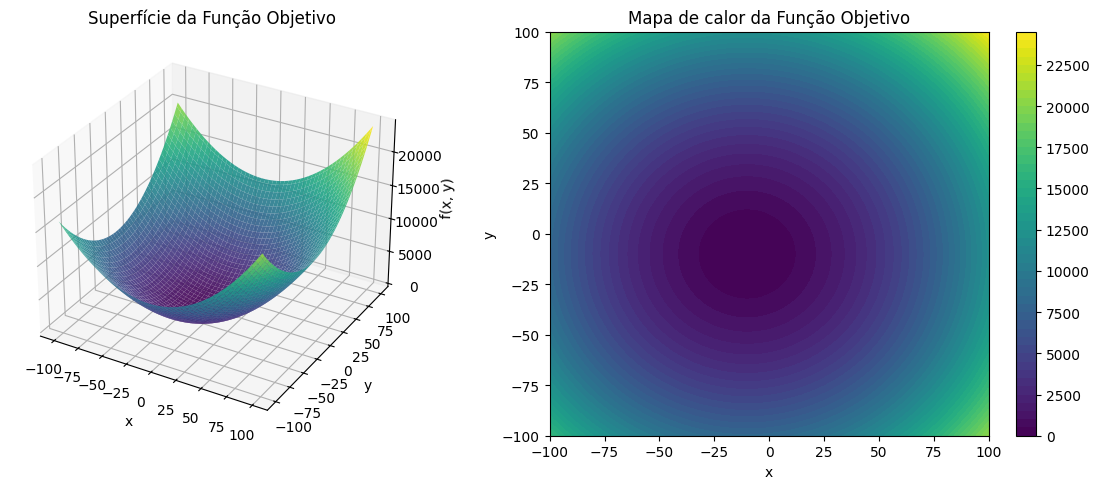

In [35]:
plot_funcao_objetivo(f_shift, -100, 100)


In [36]:
melhor, convergencia, lobos_posicoes = Grey_Wolf_Optimizer(f_shift, dim, lim_inf, lim_sup, num_lobos, max_iter)

df_melhor = pd.DataFrame(melhor)

df_melhor.rename(columns={'pos' : 'x', 'score' : 'f(x)'})

df_melhor.head(1)


,pos,score
0,-10.041448,0.001723


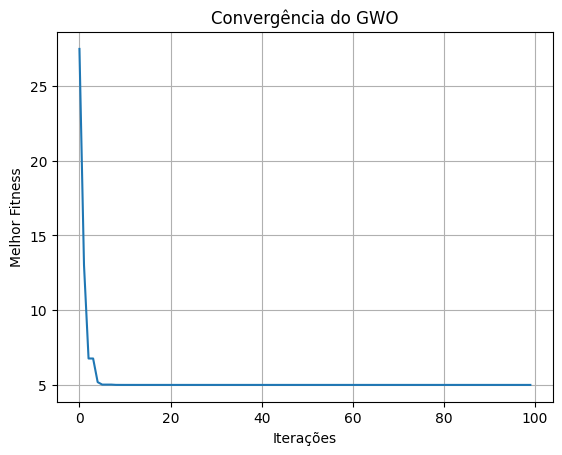

In [16]:
plt.plot(convergencia)
plt.title("Convergência do GWO")
plt.xlabel("Iterações")
plt.ylabel("Melhor Fitness")
plt.grid(True)
plt.show()

# Bibliografia
EvoloPy/EvoloPy/optimizers/GWO.py at master · 7ossam81/EvoloPy. GitHub. Disponível em: <https://github.com/7ossam81/EvoloPy/blob/master/EvoloPy/optimizers/GWO.py>. Acesso em: 9 nov. 2025.

MIRJALILI, Seyedali. uCity. uCity. Disponível em: <https://seyedalimirjalili.com/gwo>. Acesso em: 9 nov. 2025.

MIRJALILI, Seyedali; MIRJALILI, Seyed Mohammad; LEWIS, Andrew. Grey Wolf Optimizer. Advances in Engineering Software, v. 69, p. 46–61, 2014. Disponível em: <https://linkinghub.elsevier.com/retrieve/pii/S0965997813001853>. Acesso em: 9 nov. 2025.

RAJWAR, Kanchan; DEEP, Kusum; DAS, Swagatam. An exhaustive review of the metaheuristic algorithms for search and optimization: taxonomy, applications, and open challenges. Artificial Intelligence Review, v. 56, n. 11, p. 13187–13257, 2023. Disponível em: <https://link.springer.com/10.1007/s10462-023-10470-y>. Acesso em: 9 nov. 2025.
